Taking the output from DEG-SEQ2, the data "5LS_L2L3Combined.csv" contains the 5 life stages we are interested in:
Embryo, L1 larva, Dauer Larva, L2L3 Larva and Adult, lets take a peek of that data

In [1]:
import csv
import os

#user configurable variables
number_of_lines_to_print=10
expressionCountFile=os.path.join(os.getcwd(),'csvs/5LS_L2L3Combined.csv')
#Code Chunk for printing the file
with open(os.path.join(os.getcwd(),expressionCountFile)) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        print(row)
        number_of_lines_to_print-=1
        if number_of_lines_to_print<=0:
            break
        
        

['WBID', 'elongating embryo Ce', 'L1 larva Ce', 'dauer larva Ce', 'adult Ce', 'L2L3_larva']
['WBGene00000001', '4208', '12140', '5547', '2246', '2369']
['WBGene00000002', '12554', '7828', '831', '280', '2591']
['WBGene00000003', '7180', '11253', '570', '212', '2466']
['WBGene00000004', '33305', '26947', '3212', '576', '5391']
['WBGene00000005', '595', '132', '37', '281', '1410']
['WBGene00000006', '425', '12243', '3146', '228', '2446']
['WBGene00000007', '36', '314', '129', '197', '1719']
['WBGene00000008', '0', '19', '663', '19', '182']
['WBGene00000009', '71', '416', '193', '20', '64']


Now, we need to determine the genes that we consider to be life stage biased, here are the some criterias that must be fullfilled to be considered a life stage biased gene:

<ol start="1">   
  <li>This gene has the highest expression in that life stage</li>
  <li>This gene's expression at this life stage has at least a fold difference of 2 comparing the max expression in other life stages</li>
  <li>At least one life stage has a count that is higher than at least 10% of of counts across all life stages. <br>
      <font size="2">*This ensures we dont include genes that have high fold diff due to unbalanced low expression counts, for example, a gene has a count of 1 in one life stage and are not found in other life stages(0 counts),this gene is a uniformly lowly expressed gene in all life stages, however, using the criteria one, this gene would have a fold difference of infinity, by setting a lower bound filter, we exclude these extremely lowly expressed gene counts that are prone to sequencing uncertainties. </font> </li>
  
</ol>


Let's process the expression file using above criterias:

In [2]:
from Code import LifeStageBiased as LSB
#Speficy input and output
LSB.inputFile= expressionCountFile
outputFilePath=os.path.join(os.getcwd(),'csvs/LSB.csv')
LSB.outputFile= outputFilePath
LSB.cutLowPercentile=0.1
LSB.fixedCutValue=0 #This overrides the percentil cut value, set to 0 disables it
LSB.main()


Now the genes that fit into our criteria should be in the *outputFilePath* we set ealier, lets take a look at that:

Index(['GeneID', 'LS', 'LS_EXP', 'SecondMax', 'RestMean', 'FoldDiff'], dtype='object')
             LS_EXP      SecondMax       RestMean      FoldDiff        LS_LOG
count  1.007100e+04   10071.000000   10071.000000  1.007100e+04  10071.000000
mean   1.684420e+04    4113.559229    2197.957700           inf      7.073462
std    7.361219e+04   19060.400316   10181.883323           NaN      2.554448
min    2.000000e+00       0.000000       0.000000  2.000656e+00      0.693147
25%    1.585000e+02      28.000000      12.250000  2.644444e+00      5.065750
50%    1.309000e+03     251.000000     110.250000  3.807547e+00      7.177019
75%    8.288500e+03    1955.000000     994.125000  6.815824e+00      9.022622
max    2.253663e+06  540124.000000  315851.750000           inf     14.628067

Data Summary By Life Stage Group
                      LS_EXP                                            \
                       count          mean            std  min     25%   
LS                           

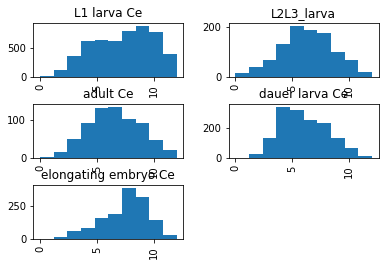

In [37]:
import pandas as pd 
import numpy as np
data = pd.read_csv(outputFilePath)

print(data.columns)
data.head()
data[["LS_EXP","SecondMax","FoldDiff"]]=data[["LS_EXP","SecondMax","FoldDiff"]].apply(pd.to_numeric)
data.sort_values(by=['FoldDiff'],ascending=False)


data['LS_LOG']=np.log((data['LS_EXP']))

print(data.describe())
print()
print("Data Summary By Life Stage Group")
print(data.groupby("LS").describe())

ax=data['LS_LOG'].hist(by=data['LS'],range=[0,12])

